In [1]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Home-PC\\Desktop\\happy\\salaries.csv")
df. head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [2]:
inputs = df.drop('salary_more_then_100k',axis='columns')
target = df['salary_more_then_100k']

In [3]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [4]:
inputs['company_n']=le_company.fit_transform(inputs['company'])
inputs['job_n']=le_company.fit_transform(inputs['job'])
inputs['degree_n']=le_company.fit_transform(inputs['degree'])


In [5]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [6]:
inputs_n =inputs.drop(['company','job','degree'],axis='columns')
inputs_n


,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [7]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [8]:
from sklearn import tree
model= tree.DecisionTreeClassifier()

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(inputs_n,target,test_size=0.2)
X_test

,company_n,job_n,degree_n
11,1,2,1
2,2,0,0
14,1,1,0
8,0,0,0


In [10]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.5

In [12]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 1, 1, 0], dtype=int64)

In [13]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_predicted)

Text(69.0, 0.5, 'truth')

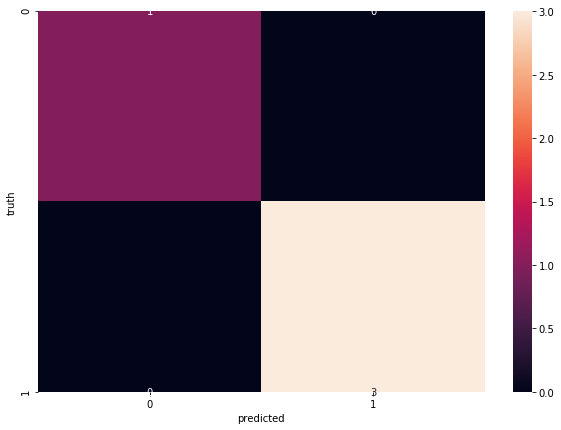

In [15]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')